In [54]:
#Import packages

#Rdkit
from rdkit import Chem
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Pandas
import pandas as pd
from pandas import DataFrame

#Others
import random
import numpy as np
import os
import math
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [55]:
#AlvaDesc (If 'AlvaDesc' is not installed, load the corresponding csv file)
from alvadesccliwrapper.alvadesc import AlvaDesc
#AlvaDesc Path(Linux default alvaDescCLI location)
aDesc = AlvaDesc('./') 

In [56]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [57]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Paper_0_Hydrogel")

In [58]:
X_test_scaled=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
Pubchem_data=pd.read_csv("./Original data/Pubchem_data_clearn.csv",sep=',',index_col=0)
Predicted_data=pd.read_csv("./Results/LR_predict_data.csv",sep=',',index_col=0)
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/raw_data.csv',index_col=0)


In [59]:
result=pd.read_csv("./Results/LR_predict_data.csv",sep=',')
result=pd.DataFrame(result)
result=result.sort_values(by=['Probability of gelator'],ascending=True)
result["rank"]=list(range(1,len(result)+1))
result

,cid,Probability of nongelator,Probability of gelator,rank
7256,84015621,0.764249,0.235751,1
7255,1838,0.759125,0.240875,2
7254,42553033,0.736183,0.263817,3
7253,42553032,0.736183,0.263817,4
7252,71832128,0.736183,0.263817,5
...,...,...,...,...
4,293725,0.340278,0.659722,7253
3,131876227,0.323628,0.676372,7254
2,21826754,0.319758,0.680242,7255
1,92252368,0.319758,0.680242,7256


In [60]:
result['%']=result["rank"]/7257
result['%']=result['%'].round(3)
result.to_csv("./Results/Fig.s6.csv",sep=',')
result

,cid,Probability of nongelator,Probability of gelator,rank,%
7256,84015621,0.764249,0.235751,1,0.000
7255,1838,0.759125,0.240875,2,0.000
7254,42553033,0.736183,0.263817,3,0.000
7253,42553032,0.736183,0.263817,4,0.001
7252,71832128,0.736183,0.263817,5,0.001
...,...,...,...,...,...
4,293725,0.340278,0.659722,7253,0.999
3,131876227,0.323628,0.676372,7254,1.000
2,21826754,0.319758,0.680242,7255,1.000
1,92252368,0.319758,0.680242,7256,1.000


In [61]:
resultX1=result.loc[result["cid"] ==21826754]
resultX2=result.loc[result["cid"] ==77518952]
resultX3=result.loc[result["cid"] ==135398631]
resultX4=result.loc[result["cid"] ==135398640]
resultX5=result.loc[result["cid"] ==9427]
resultX6=result.loc[result["cid"] ==135596592]
resultX7=result.loc[result["cid"] ==135518164]
resultX8=result.loc[result["cid"] ==135407175]
resultX9=result.loc[result["cid"] ==135763231]
resultX10=result.loc[result["cid"] ==13542524]
resultX11=result.loc[result["cid"] ==135491415]
resultX12=result.loc[result["cid"] ==136441961]

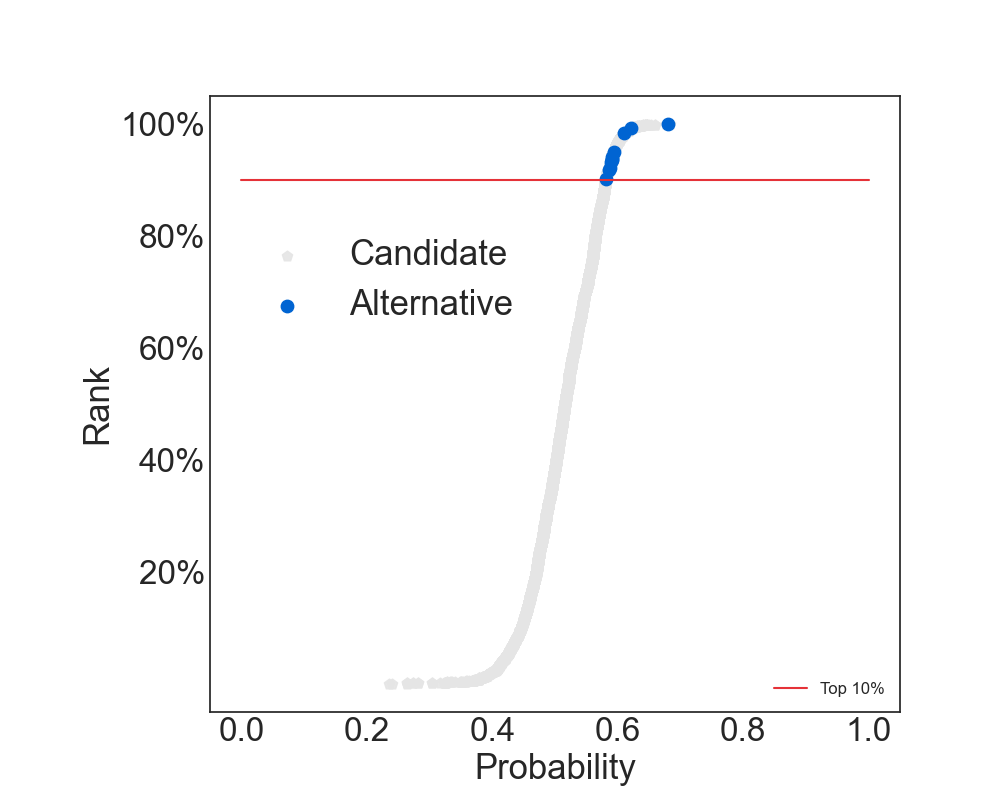

In [62]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (10, 8) 
fig = plt.figure(1)
x = [0,1]
y = [len(result)*0.90/7257,len(result)*0.90/7257]
P=plt.plot(x,y,color='#e53238')
P1=plt.scatter(result['Probability of gelator'], result['%'],  alpha=0.9, marker='p', color='#e5e5e5',s=60)
P2=plt.scatter(resultX1['Probability of gelator'],resultX1['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P3=plt.scatter(resultX2['Probability of gelator'],resultX2['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX3['Probability of gelator'],resultX3['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P2=plt.scatter(resultX4['Probability of gelator'],resultX4['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P3=plt.scatter(resultX5['Probability of gelator'],resultX5['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX6['Probability of gelator'],resultX6['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P2=plt.scatter(resultX7['Probability of gelator'],resultX7['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P3=plt.scatter(resultX8['Probability of gelator'],resultX8['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX9['Probability of gelator'],resultX9['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P3=plt.scatter(resultX10['Probability of gelator'],resultX10['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX11['Probability of gelator'],resultX11['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX12['Probability of gelator'],resultX12['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
plt.xlabel('Probability',fontsize = 25)
yData = [0.2,0.4, 0.6, 0.8,1.0]
yLim= ["20%","40%","60%","80%","100%"]
plt.yticks(yData,yLim)
plt.ylabel('Rank',fontsize = 25)
plt.tick_params(labelsize=24) 
l1=plt.legend(P, ['Top 10%'], loc="lower right",scatterpoints=1,fontsize='large')
l2=plt.legend([P1,P2], ['Candidate', 'Alternative'],bbox_to_anchor=(0.25,0.7),loc=10,scatterpoints=1,fontsize = 25)
plt.gca().add_artist(l1)
plt.gcf().subplots_adjust(left=0.21)
plt.savefig("./original figure/Figure 3b.svg", dpi=300,format="svg")
plt.show()

In [63]:
result_TOP=result[result['%']>= 0.9]
result_TOP

,cid,Probability of nongelator,Probability of gelator,rank,%
729,2783888,0.418937,0.581063,6528,0.900
728,6553883,0.418937,0.581063,6529,0.900
727,162450,0.418937,0.581063,6530,0.900
726,92132209,0.418937,0.581063,6531,0.900
725,121487282,0.418898,0.581102,6532,0.900
...,...,...,...,...,...
4,293725,0.340278,0.659722,7253,0.999
3,131876227,0.323628,0.676372,7254,1.000
2,21826754,0.319758,0.680242,7255,1.000
1,92252368,0.319758,0.680242,7256,1.000


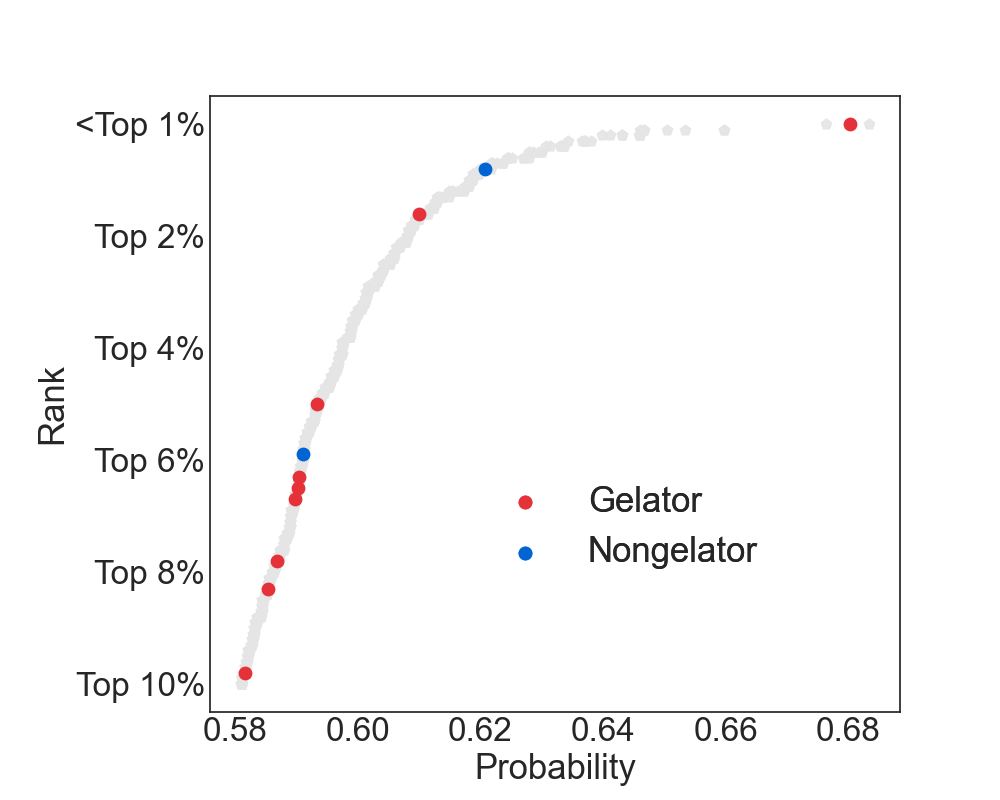

In [112]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (10, 8) 
fig = plt.figure(1)
#x = [0,1]
#y = [len(result_TOP)*0.90/7257,len(result_TOP)*0.90/7257]

#P=plt.plot(x,y,color='#e53238')
P1=plt.scatter(result_TOP['Probability of gelator'], result_TOP['%'],  alpha=0.9, marker='p', color='#e5e5e5',s=60)
P2=plt.scatter(resultX1['Probability of gelator'],resultX1['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P3=plt.scatter(resultX2['Probability of gelator'],resultX2['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P4=plt.scatter(resultX3['Probability of gelator'],resultX3['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P5=plt.scatter(resultX4['Probability of gelator'],resultX4['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P6=plt.scatter(resultX5['Probability of gelator'],resultX5['%'] ,  alpha=1, marker='o', color='#0064d2',s=80)
P7=plt.scatter(resultX6['Probability of gelator'],resultX6['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P8=plt.scatter(resultX7['Probability of gelator'],resultX7['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P9=plt.scatter(resultX8['Probability of gelator'],resultX8['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P10=plt.scatter(resultX9['Probability of gelator'],resultX9['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P11=plt.scatter(resultX10['Probability of gelator'],resultX10['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P12=plt.scatter(resultX11['Probability of gelator'],resultX11['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
P13=plt.scatter(resultX12['Probability of gelator'],resultX12['%'] ,  alpha=1, marker='o', color='#e53238',s=80)
plt.xlabel('Probability',fontsize = 25)
yData = [0.90,0.92, 0.94, 0.96,0.98,1.0]
yLim= ["Top 10%","Top 8%","Top 6%","Top 4%","Top 2%","<Top 1%"]
plt.yticks(yData,yLim)
plt.ylabel('Rank',fontsize = 25)
plt.tick_params(labelsize=24) 
#l1=plt.legend(P, ['Top 10%'], loc="lower right",scatterpoints=1,fontsize='large')
l1=plt.legend([P2,P3], ['Gelator', 'Nongelator'],bbox_to_anchor=(0.6,0.3),loc=10,scatterpoints=1,fontsize = 25)
plt.gca().add_artist(l1)
plt.gcf().subplots_adjust(left=0.21)
plt.savefig("./original figure/Figure 3c.svg", dpi=300,format="svg")


In [113]:
x = result['Probability of gelator']

In [114]:
#Obtaining Curve Data
x1=sns.distplot(x).get_lines()[0].get_data()[0]
y1=sns.distplot(x).get_lines()[0].get_data()[1]

In [115]:
z1=[h.get_height() for h in sns.distplot(x).patches]
z2=[h.get_width() for h in sns.distplot(x).patches]
aa=x.quantile([0.9])

In [119]:
l =pd.DataFrame( [[h.xy[0], h.get_width(), h.get_height()] for h in sns.distplot(x).patches])

l 

,0,1,2
0,0.235751,0.008951,0.030789
1,0.244702,0.008951,0.000000
2,0.253653,0.008951,0.000000
3,0.262604,0.008951,0.046184
4,0.271555,0.008951,0.030789
...,...,...,...
295,0.638548,0.008951,0.169341
296,0.647499,0.008951,0.030789
297,0.656450,0.008951,0.030789
298,0.665401,0.008951,0.000000


In [120]:
l1=l[(l[0]>=0.5)&(l[0]<aa.tolist()[0])]
l2=l[l[0]<0.5]
l3=l[l[0]>=aa.tolist()[0]]
l .columns=['Gelability','width','Density']
l .to_csv("./Results/Fig.3a1.csv",sep=',')

In [121]:
df=pd.DataFrame({'x':x1, 'y':y1})


In [122]:
df1=df[df["x"]<0.5]
df2=df[(df["x"]<aa.tolist()[0])&(df["x"]>=0.5)]
df3=df[df["x"]>=aa.tolist()[0]]

In [123]:
input=0.5
d1=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(d1).tolist()[0][0]

0.501159901110855

In [124]:
input=aa.tolist()[0]
d2=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(d2).tolist()[0][0]

0.5819023226978411

In [125]:
#DTT
input=0.680
DTT=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(DTT).tolist()[0][0]

0.6803071490069805

In [126]:
#XTS
input=0.621
XTS=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(XTS).tolist()[0][0]

0.6197503328167409

In [127]:
#GMP
input=0.610
GMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(GMP).tolist()[0][0]

0.6096575301183677

In [128]:
#IMP
input=0.593
IMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(IMP).tolist()[0][0]

0.5919951253962144

In [129]:
#5-FUR
input=0.591
FFUR=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(FFUR).tolist()[0][0]

0.5919951253962144

In [130]:
#8-AG
input=0.590
EAG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EAG).tolist()[0][0]

0.5894719247216211

In [131]:
#dGMP
input=0.590
dGMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(dGMP).tolist()[0][0]

0.5894719247216211

In [132]:
#8-OHG
input=0.590
EOHG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EOHG).tolist()[0][0]

0.5894719247216211

In [133]:
#8-AzaG
input=0.587
EAzaG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EAzaG).tolist()[0][0]

0.5869487240470277

In [134]:
#I-5’-CA
input=0.585
IFCA=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(IFCA).tolist()[0][0]

0.5844255233724345

In [135]:
#2’-NH2-dG
input=0.585
TNHTdG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(TNHTdG).tolist()[0][0]

0.5844255233724345

In [136]:
#2’-OMe-dG
input=0.582
TOMedG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(TOMedG).tolist()[0][0]

0.5819023226978411

In [139]:
df=pd.concat([DTT,XTS,GMP,IMP,FFUR,EAG,dGMP,EOHG,EAzaG,IFCA,TNHTdG,TOMedG])
df.index=['DTT', 'XTS','GMP','IMP','5-FUR','8-AG','dGMP','8-OHG','8-AzaG','I-5’-CA','2’-NH2-dG','2’-OMe-dG']
df.columns=['Gelability','Density']
df .to_csv("./Results/Fig.3a2.csv",sep=',')

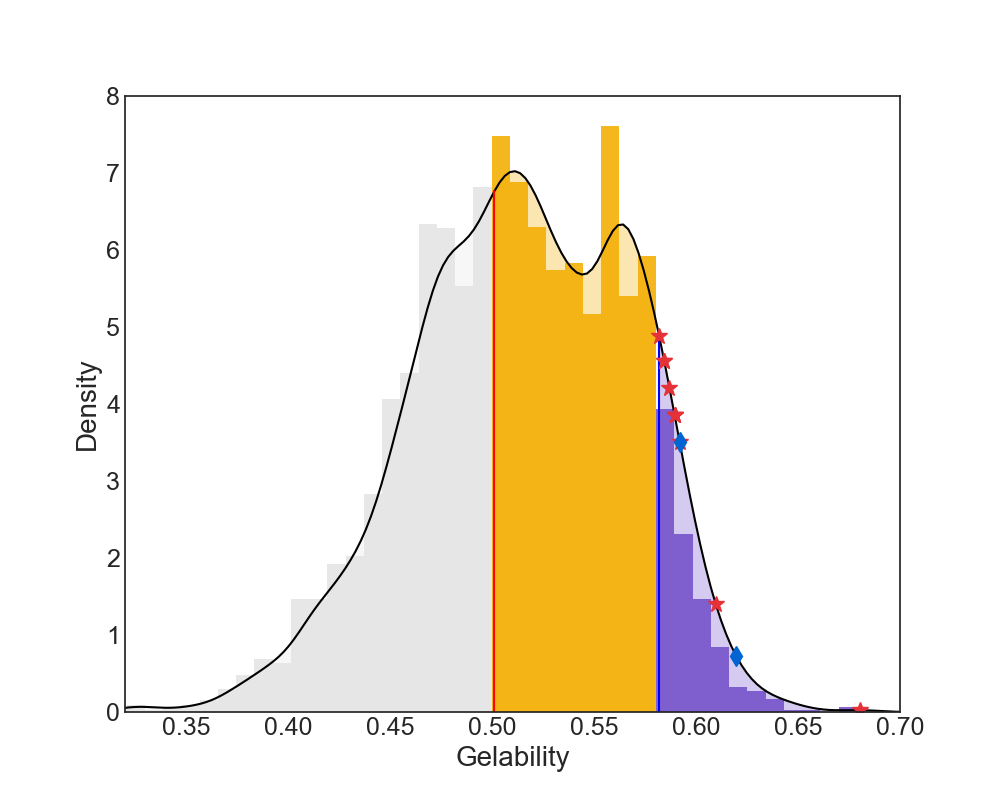

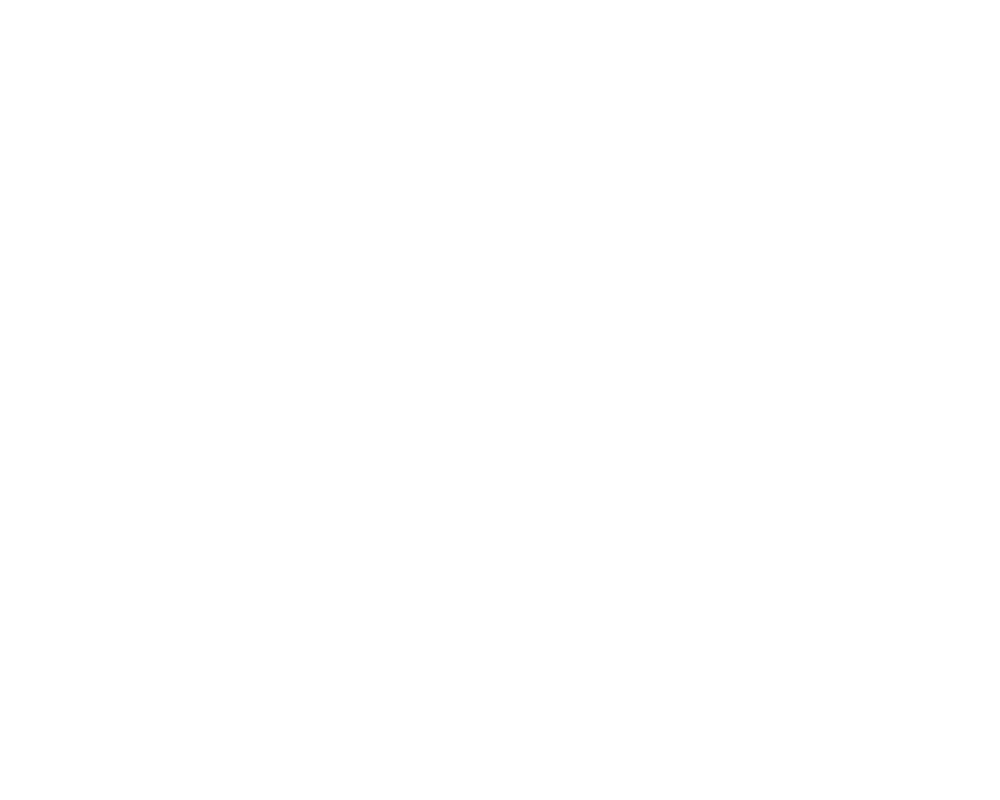

In [140]:
plt.style.use('seaborn-white')
plt.cla() 
plt.close() 
plt.clf()
fig, (ax1) = plt.subplots(1)
#plt.bar(x1,z1)
#plt.bar(z1,z2,width=width) 
plt.xlim(0.32,0.7)
plt.ylim(0,8)
plt.xlabel('Gelability',fontsize = 20)
plt.ylabel('Density',fontsize = 20)
plt.tick_params(labelsize=18) 
plt.rcParams['figure.figsize'] = (16, 6) 
#ax1.fill_between(x1, y1, alpha=.7, linewidth=0,color="#e5e5e5")
ax1.fill_between(df1['x'], df1['y'], alpha=0.3, linewidth=0,color="#e5e5e5")
ax1.fill_between(df2['x'], df2['y'], alpha=0.3, linewidth=0,color="#f5af02")
ax1.fill_between(df3['x'], df3['y'], alpha=0.3, linewidth=0,color="#7552cc")
plt.plot(x1, y1,color='black')
plt.bar(l1[0].tolist(),l1[2].tolist(),alpha=0.3,width=l1[1].tolist(),color="#f5af02")
plt.bar(l2[0].tolist(),l2[2].tolist(),alpha=0.3,width=l2[1].tolist(),color="#e5e5e5")
plt.bar(l3[0].tolist(),l3[2].tolist(),alpha=0.3,width=l3[1].tolist(),color="#7552cc")
plt.axvline(np.array(d1).tolist()[0][0], 0,np.array(d1).tolist()[0][1]/8,  color='red')
plt.axvline(np.array(d2).tolist()[0][0], 0,np.array(d2).tolist()[0][1]/8,  color='blue')
plt.plot(np.array(DTT).tolist()[0][0], np.array(DTT).tolist()[0][1],marker='*',color='#e53238', markersize=12,markerfacecolor='#e53238')
plt.plot(np.array(XTS).tolist()[0][0], np.array(XTS).tolist()[0][1],marker='d', color='#0064d2',markersize=10,markerfacecolor='#0064d2')
plt.plot(np.array(GMP).tolist()[0][0], np.array(GMP).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(IMP).tolist()[0][0], np.array(IMP).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(FFUR).tolist()[0][0], np.array(FFUR).tolist()[0][1], marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(np.array(EAG).tolist()[0][0], np.array(EAG).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(dGMP).tolist()[0][0], np.array(dGMP).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(EOHG).tolist()[0][0], np.array(EOHG).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(EAzaG).tolist()[0][0], np.array(EAzaG).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(IFCA).tolist()[0][0], np.array(IFCA).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(TNHTdG).tolist()[0][0], np.array(TNHTdG).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(np.array(TOMedG).tolist()[0][0], np.array(TOMedG).tolist()[0][1], marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.show()

In [33]:
plt.savefig("./original figure/Figure 3a.svg", dpi=300,format="svg")

<Figure size 1152x432 with 0 Axes>

In [34]:
Raw_all_data=X_NAomit_data[['ALOGP','ESOL','Hy','TPSA(Tot)']]
print_RxC(Raw_all_data)
Raw_all_data.head()

71 Moleculars × 4 Descriptors


,ALOGP,ESOL,Hy,TPSA(Tot)
ID,,,,
Ma_2019_A,-2.0201,-0.635691,3.098550,139.54
Ma_2019_U,-2.4504,0.193797,2.293407,124.78
Ma_2019_C,-2.4272,0.044637,3.232038,130.83
Ma_2019_G,-2.4107,-0.254351,4.009955,159.51
Ma_2019_dA,-1.2538,-1.136191,2.213815,119.31


In [35]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Raw_all_data)
X_scaled_data=Transformer.transform(Raw_all_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Raw_all_data.columns
X_scaled_data.index=Raw_all_data.index
X_scaled_data['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
print_RxC(X_scaled_data)
X_scaled_data.head()

71 Moleculars × 5 Descriptors


,ALOGP,ESOL,Hy,TPSA(Tot),Hydrogel-forming ability
ID,,,,,
Ma_2019_A,0.117842,0.874849,0.443413,0.472652,Gelator
Ma_2019_U,0.078096,1.000000,0.286732,0.330770,Gelator
Ma_2019_C,0.080239,0.977495,0.469390,0.388926,Gelator
Ma_2019_G,0.081763,0.932384,0.620773,0.664616,Gelator
Ma_2019_dA,0.188622,0.799334,0.271243,0.278189,Gelator


In [36]:
X_scaled_data.to_csv("./Results/Fig.s5.csv",sep=',')

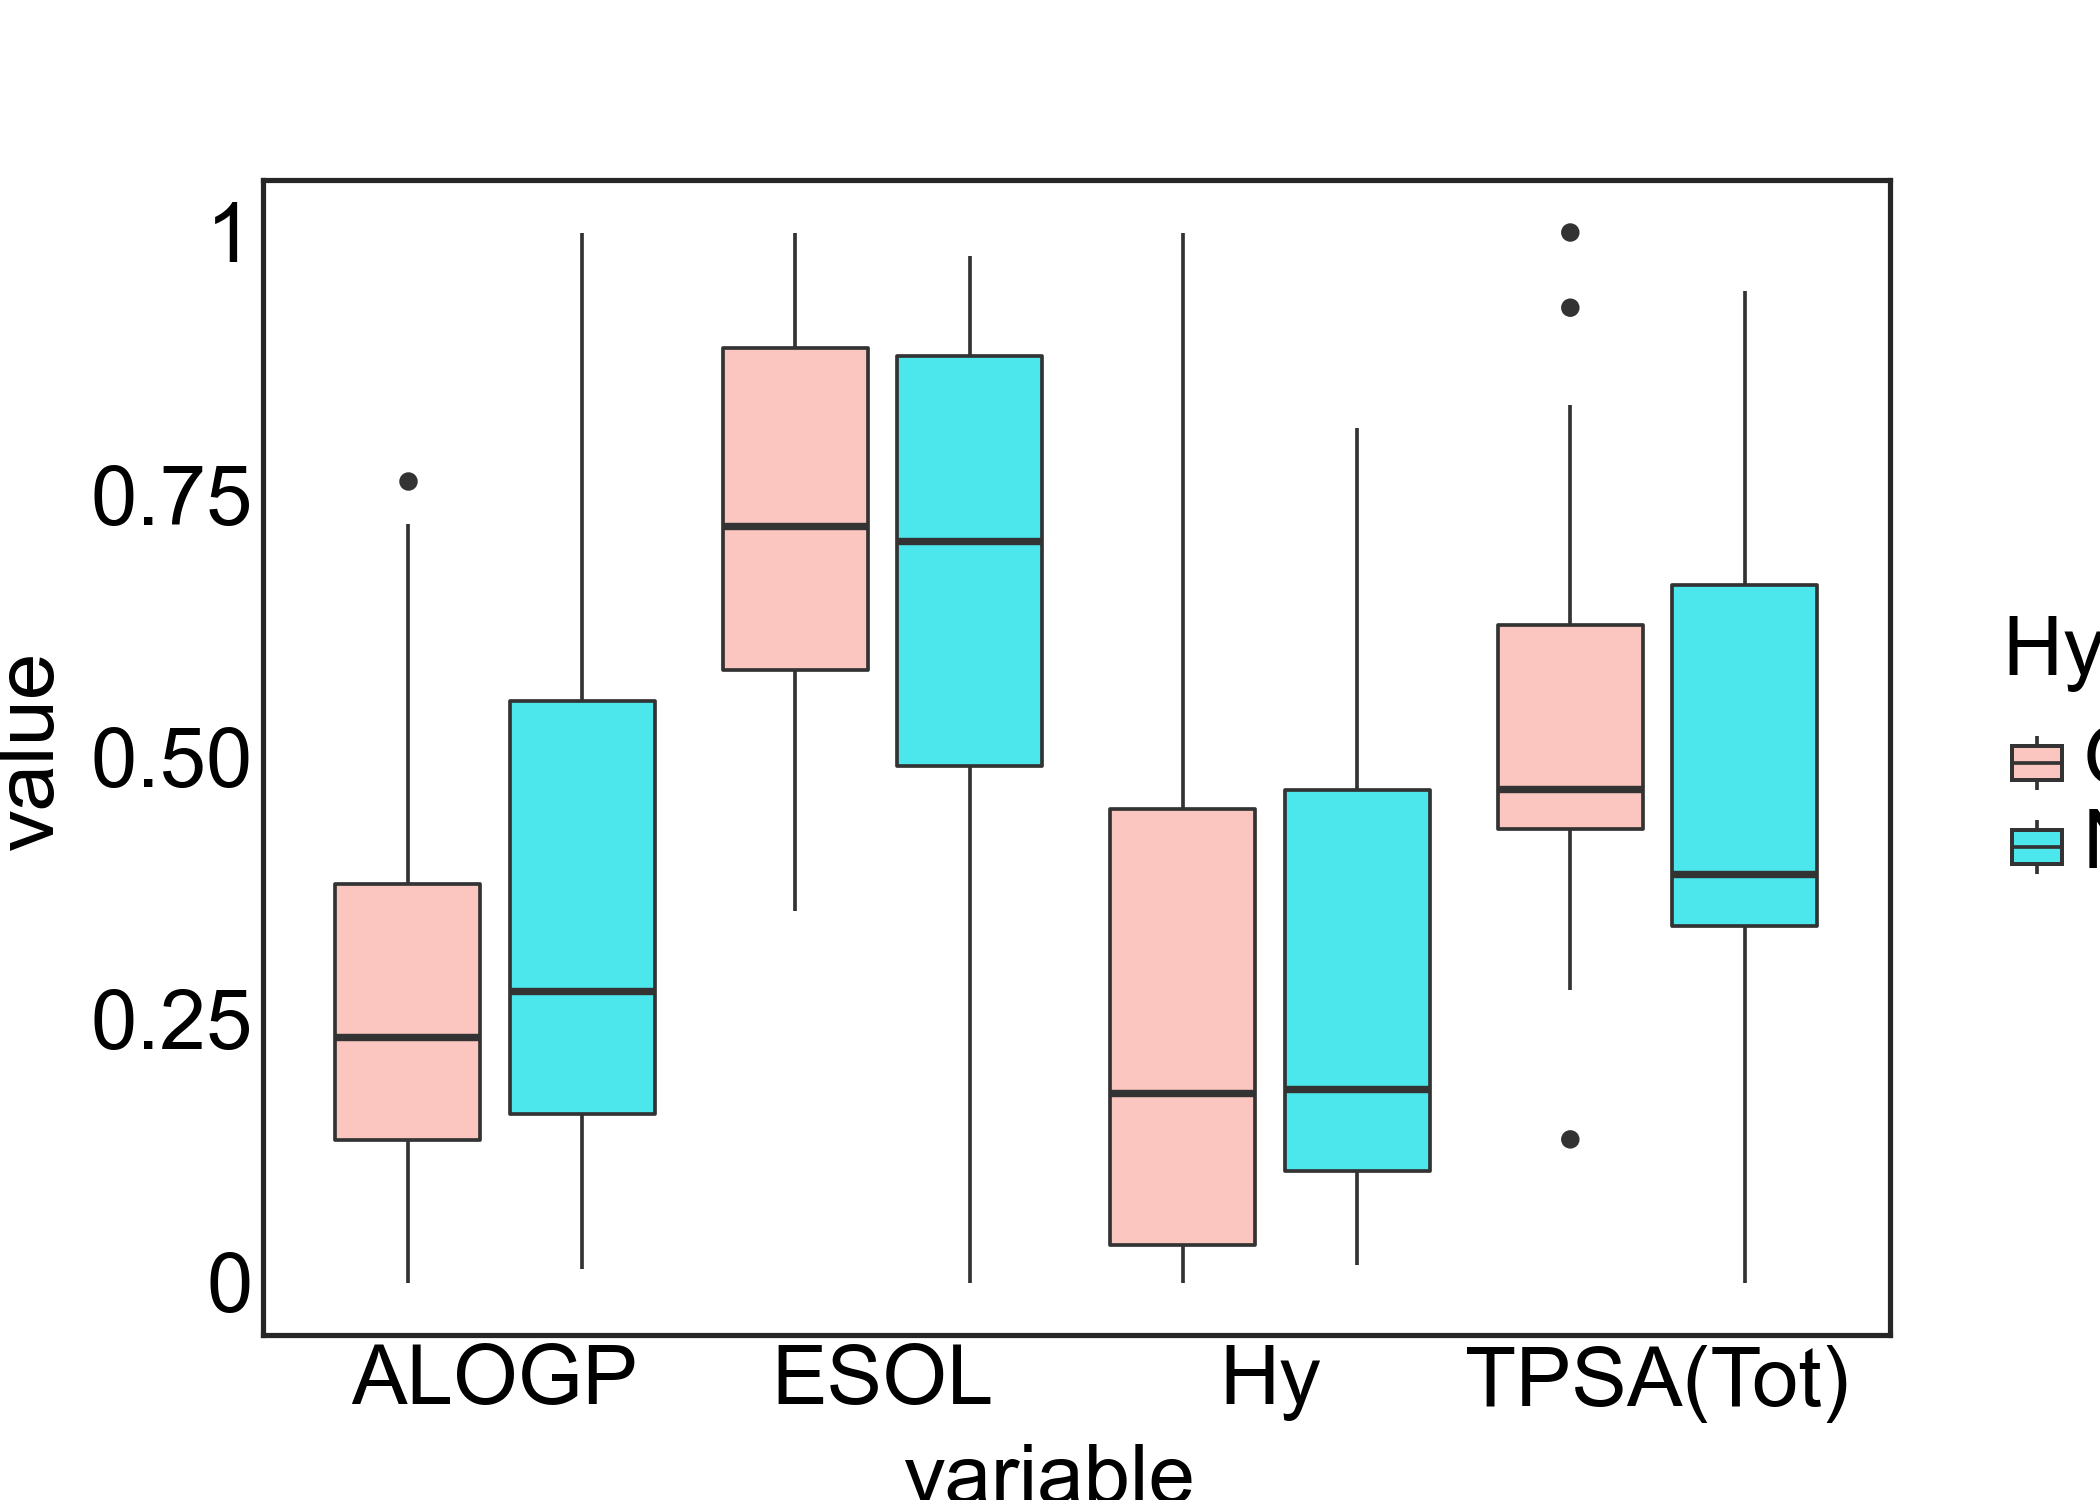

In [316]:
df=pd.melt(X_scaled_data,id_vars=['Hydrogel-forming ability'])
df["Descriptors"]=df["variable"]
df["Values"]=df["value"]
box2_plot=(ggplot(df, aes(x = "variable", y = "value"))
+ geom_boxplot(aes(fill="Hydrogel-forming ability"),position = position_dodge(0.9),size=0.5) 
+ guides(fill=guide_legend(title="Hydrogel-forming ability"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=20,colour = "black"),
       dpi=300,
       figure_size=(7,5)))
print(box2_plot)
box2_plot.save("./original figure/Figure 3a.svg", units="in", dpi=300)

In [219]:
Pubchem_data=Pubchem_data.loc[X_test_scaled.index.to_list()]
aDesc.set_input_SMILES(Pubchem_data['Canonical_smiles'].tolist())
if not aDesc.calculate_descriptors(['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']):
 print('Error:' + aDesc.get_error())
else:
 Pubchem_descriptors=aDesc.get_output()

Error:'.' ڲⲿҲǿеĳ
ļ



In [213]:
Pubchem_all_data=pd.concat([Predicted_data['Probability of gelator']],axis=1)
Pubchem_all_data=Pubchem_all_data.sort_values('Probability of gelator', ascending=False)
Pubchem_gel_data=Pubchem_all_data.iloc[range(0,int(len(Pubchem_all_data)*0.1)),]
Pubchem_gel_data=Pubchem_gel_data.drop(['Probability of gelator'],axis=1)
Pubchem_gel_data.index.names=['ID']
Pubchem_gel_data['Probability of gelator']="Top 10%"
Pubchem_gel_data.to_csv("./Original data/Pubchem_gel_data.csv",sep=',',header=1,index=1)

In [214]:
# If 'AlvaDesc' is not installed, load the 'Pubchem_gel_data.csv' file
Pubchem_gel_data= pd.read_csv("./Original data/Pubchem_gel_data.csv",header=0,index_col=0)
print_RxC(Pubchem_gel_data)
Pubchem_gel_data.head()

725 Moleculars × 1 Descriptors


,Probability of gelator
ID,
445132,Top 10%
21826754,Top 10%
92252368,Top 10%
131876227,Top 10%
293725,Top 10%


In [215]:
Raw_all_data=X_NAomit_data[['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']]
Raw_all_data['Probability of gelator']=Raw_data['Hydrogel-forming ability']
Raw_gel_data=Raw_all_data.loc[Raw_all_data["Probability of gelator"] =='Gelator']
print_RxC(Raw_gel_data)
Raw_gel_data.head()

38 Moleculars × 9 Descriptors


,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot),Probability of gelator
ID,,,,,,,,,
Ma_2019_A,-2.0201,-0.345598,-1.9800,-1.448566,-0.635691,3.098550,139.54,139.54,Gelator
Ma_2019_U,-2.4504,-1.581610,-2.5091,-2.180370,0.193797,2.293407,124.78,124.78,Gelator
Ma_2019_C,-2.4272,-1.175610,-2.2681,-1.956970,0.044637,3.232038,130.83,130.83,Gelator
Ma_2019_G,-2.4107,-0.808423,-2.8158,-2.011641,-0.254351,4.009955,159.51,159.51,Gelator
Ma_2019_dA,-1.2538,0.393410,-0.9508,-0.603730,-1.136191,2.213815,119.31,119.31,Gelator


In [216]:
Concat_data=pd.concat([Pubchem_gel_data,Raw_gel_data])
print_RxC(Concat_data)
Concat_data.head()

763 Moleculars × 9 Descriptors


,Probability of gelator,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot)
ID,,,,,,,,,
445132,Top 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21826754,Top 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92252368,Top 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131876227,Top 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293725,Top 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
#Scale data
Concat_scale_data=Concat_data.drop(['Probability of gelator'],axis=1)
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Concat_scale_data)
X_scaled_data=Transformer.transform(Concat_scale_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Concat_scale_data.columns
X_scaled_data.index=Concat_scale_data.index
X_scaled_data['Probability of gelator']=Concat_data['Probability of gelator']
print_RxC(X_scaled_data)
X_scaled_data.head()

763 Moleculars × 9 Descriptors


,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot),Probability of gelator
ID,,,,,,,,,
445132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top 10%
21826754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top 10%
92252368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top 10%
131876227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top 10%
293725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top 10%


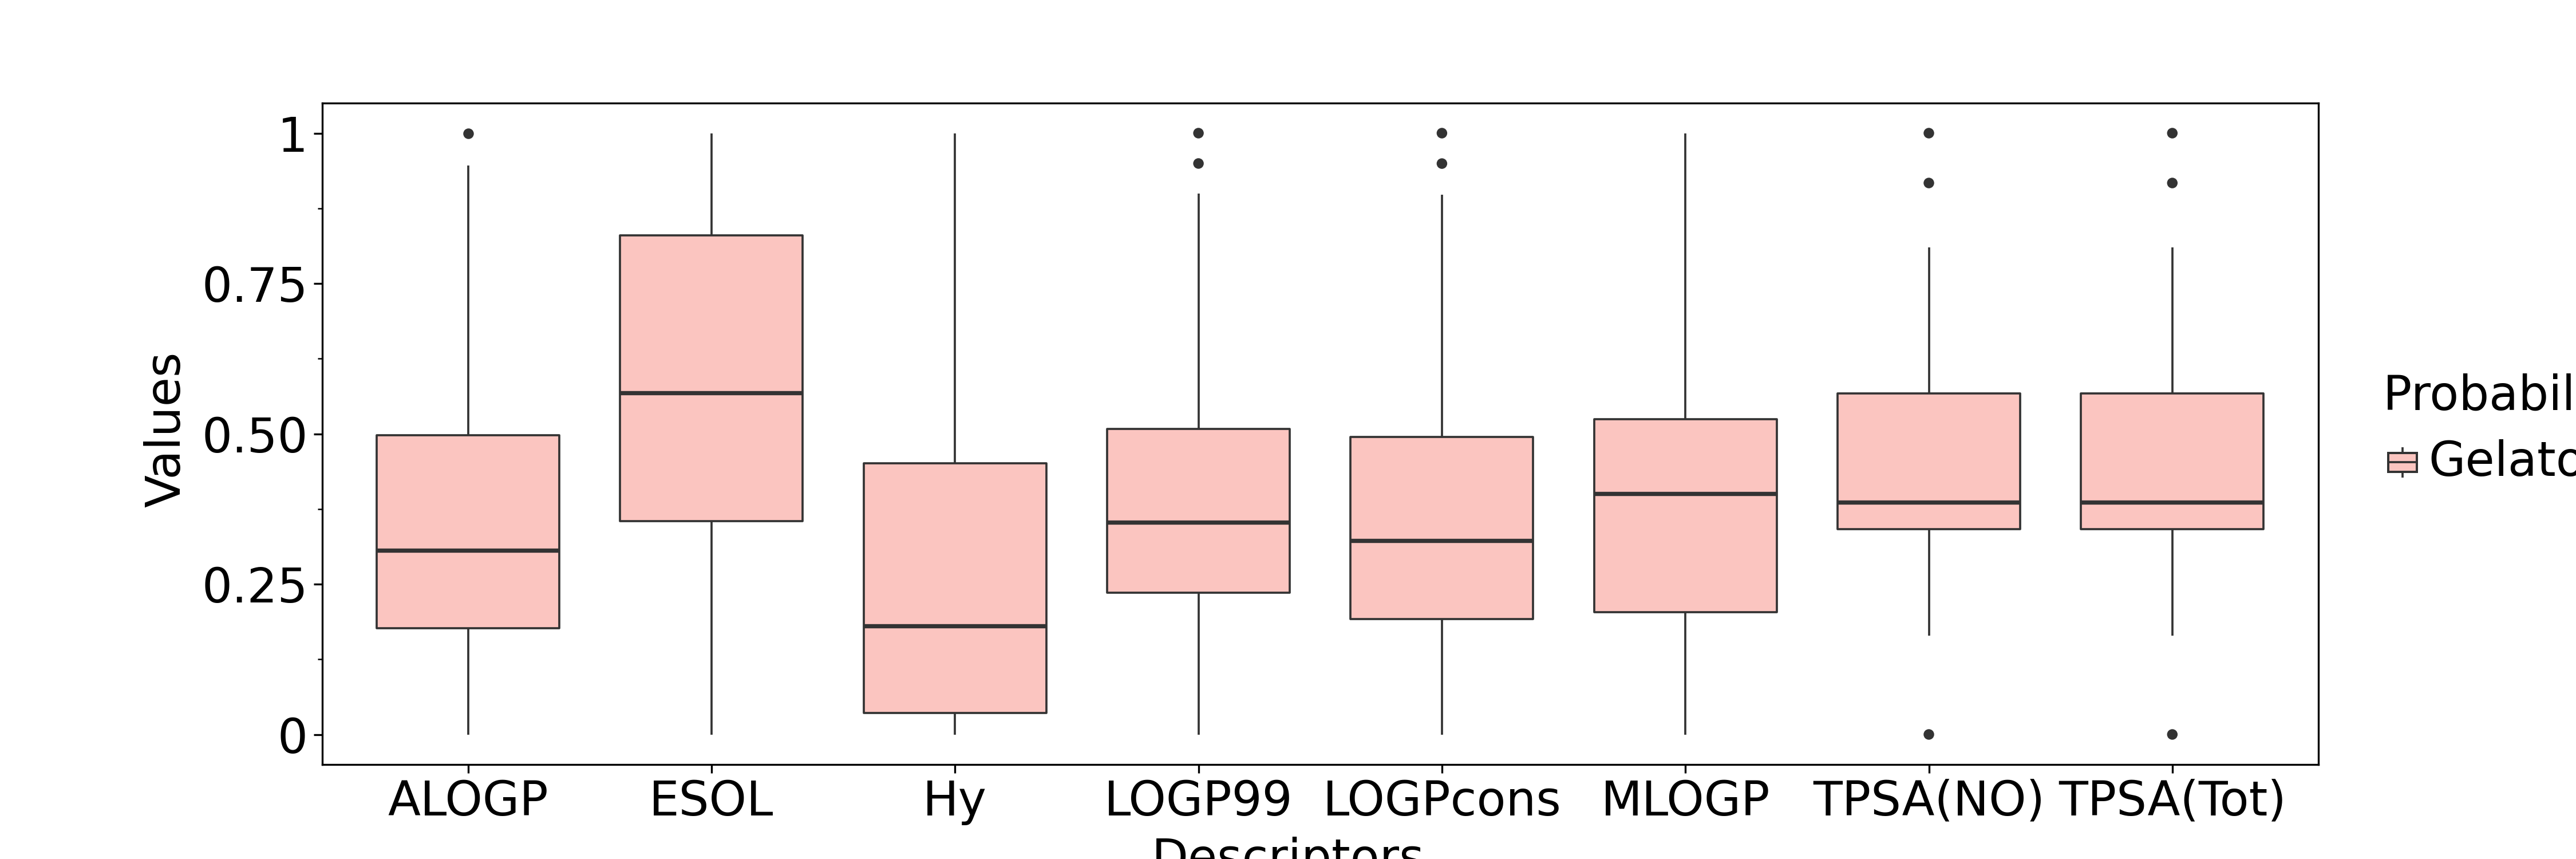

In [218]:
df=pd.melt(X_scaled_data,id_vars=['Probability of gelator'])
df["Descriptors"]=df["variable"]
df["Values"]=df["value"]
box2_plot=(ggplot(df, aes(x = "Descriptors", y = "Values"))
+ geom_boxplot(aes(fill="Probability of gelator"),position = position_dodge(0.9),size=0.5) 
+ guides(fill=guide_legend(title="Probability of gelator"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=20,colour = "black"),
       dpi=300,
       figure_size=(15,5)))
print(box2_plot)
box2_plot.save("./original figure/Figure S5.svg", units="in", dpi=300)